In [1]:
import pandas as pd
import numpy as npy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm 
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LinearRegression
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn import ensemble
import warnings
warnings.filterwarnings('ignore')
output_notebook()
%matplotlib inline


Loading BokehJS ...

In [2]:
dataset=pd.read_csv(r"C:\Users\Gamespace\Python 3 Workspace\Data Mining\Fertility\fertility.txt")
print("Shape of the dataset of Fertility: {s}".format(s=dataset.shape))
print("Column headers'names: {s}".format(s=list(dataset)))

Shape of the dataset of Fertility: (99, 10)
Column headers'names: ['-0.33', '0.69', '0', '1', '1.1', '0.1', '0.8', '0.2', '0.88', 'N']


In [3]:
dataset.head()


,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88,N
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
-0.33    99 non-null float64
0.69     99 non-null float64
0        99 non-null int64
1        99 non-null int64
1.1      99 non-null int64
0.1      99 non-null int64
0.8      99 non-null float64
0.2      99 non-null int64
0.88     99 non-null float64
N        99 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 7.8+ KB


In [5]:
dataset.describe()


,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset['N'].unique()


array(['O', 'N'], dtype=object)

In [7]:
dataset.isnull().sum()


-0.33    0
0.69     0
0        0
1        0
1.1      0
0.1      0
0.8      0
0.2      0
0.88     0
N        0
dtype: int64

In [8]:

dataset.rename(columns={'-0.33':'Season','0.69':'Age','0':'Childish_Disease','1':'Trauma','1.1':'Surgical_Intervention','0.1':'Fevers','0.8':'Alcoholic','0.2':'Smoking','0.88':'Sitting','N':'Output',})


,Season,Age,Childish_Disease,Trauma,Surgical_Intervention,Fevers,Alcoholic,Smoking,Sitting,Output
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
5,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
6,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
7,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
8,1.00,0.61,1,0,0,0,1.0,-1,0.25,N
9,1.00,0.67,1,1,0,-1,0.8,0,0.31,N


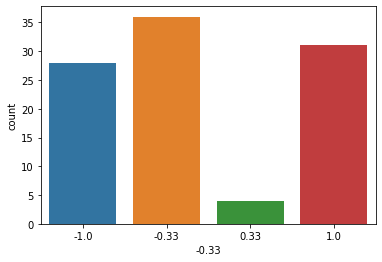

In [9]:
dataset['-0.33'].unique()
sns.countplot(x='-0.33', data=dataset)


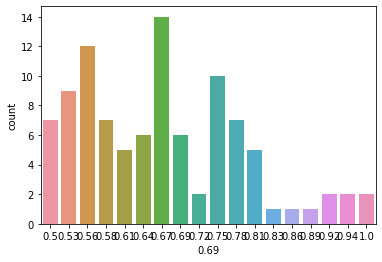

In [10]:
dataset['0.69'].unique()
sns.countplot(x='0.69', data=dataset)


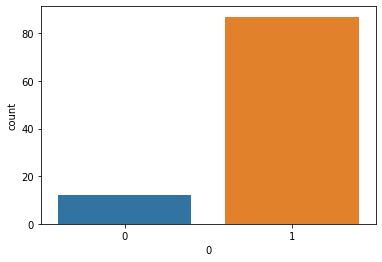

In [11]:
dataset['0'].unique()
sns.countplot(x='0', data=dataset)


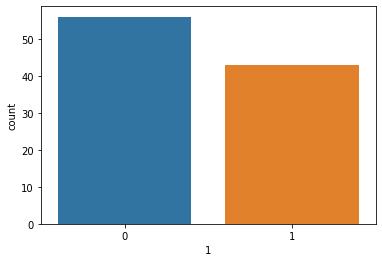

In [12]:
dataset['1'].unique()
sns.countplot(x='1', data=dataset)


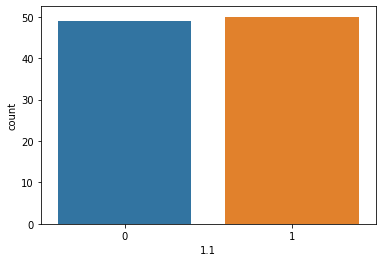

In [13]:
dataset['1.1'].unique()
sns.countplot(x='1.1', data=dataset)


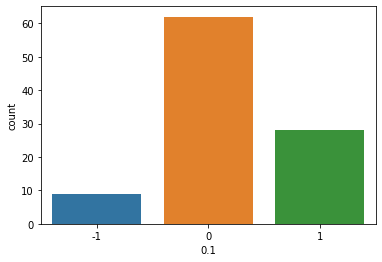

In [14]:
dataset['0.1'].unique()
sns.countplot(x='0.1', data=dataset)


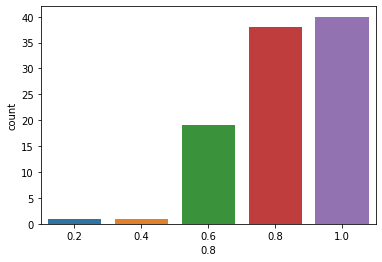

In [15]:
dataset['0.8'].unique()
sns.countplot(x='0.8', data=dataset)


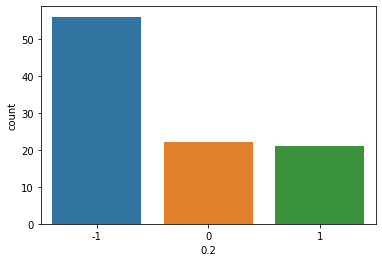

In [16]:
dataset['0.2'].unique()
sns.countplot(x='0.2', data=dataset)


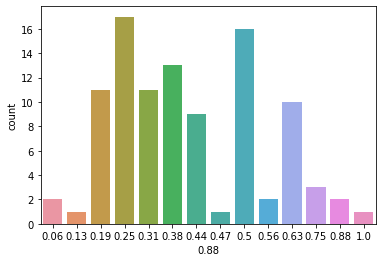

In [17]:
dataset['0.88'].unique()
sns.countplot(x='0.88', data=dataset)


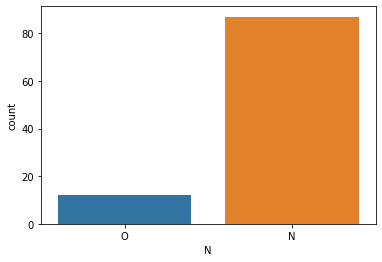

In [18]:
dataset['N'].unique()
sns.countplot(x='N', data=dataset)


In [19]:
conditions=[
    
    (dataset['-0.33']==-1),
    (dataset['-0.33']==-0.33),
    (dataset['-0.33']==0.33),
    (dataset['-0.33']==1)
]
rating=['Winter','Spring','Summer','Fall']
dataset['ratings']=npy.select(conditions,rating)
dataset.ratings.value_counts()


Spring    36
Fall      31
Winter    28
Summer     4
Name: ratings, dtype: int64

In [20]:
dataset.groupby('ratings').mean()


,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88
ratings,,,,,,,,,
Fall,1.00,0.667742,0.774194,0.322581,0.516129,0.064516,0.819355,-0.387097,0.397097
Spring,-0.33,0.681389,0.916667,0.611111,0.527778,0.083333,0.827778,-0.305556,0.431111
Summer,0.33,0.742500,1.000000,0.250000,0.250000,0.250000,0.900000,-0.500000,0.297500
Winter,-1.00,0.643214,0.928571,0.357143,0.500000,0.464286,0.842857,-0.357143,0.385000


In [21]:
conditions=[(dataset['N']=='O'),(dataset['N']=='N')]
rating=['Altered','Normal']
dataset['rating']=npy.select(conditions,rating)
dataset.rating.value_counts().sort_index()


Altered    12
Normal     87
Name: rating, dtype: int64

In [22]:
dataset.groupby('rating').mean()


,-0.33,0.69,0,1,1.1,0.1,0.8,0.2,0.88
rating,,,,,,,,,
Altered,0.334167,0.706667,0.833333,0.25000,0.583333,0.000000,0.766667,-0.250000,0.418333
Normal,-0.132989,0.663563,0.885057,0.45977,0.494253,0.218391,0.841379,-0.367816,0.399770


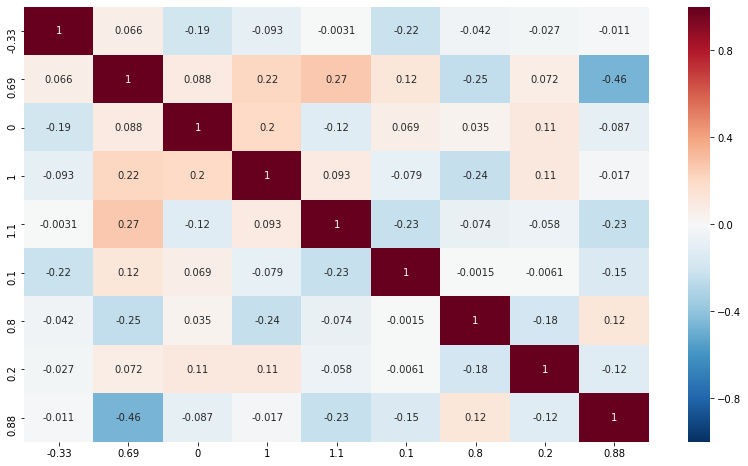

In [23]:
corelation=dataset.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corelation,annot=True,linewidth=0,vmin=-1,cmap="RdBu_r")


In [24]:
corelation['-0.33'].sort_values(ascending=False)


-0.33    1.000000
0.69     0.066010
1.1     -0.003091
0.88    -0.011239
0.2     -0.026732
0.8     -0.041934
1       -0.093313
0       -0.191464
0.1     -0.223105
Name: -0.33, dtype: float64

[Text(0, 0.5, 'Age'), Text(0.5, 0, 'Season'), Text(0.5, 1.0, 'Season VS Age')]

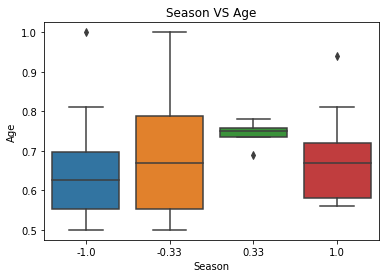

In [25]:
bx=sns.boxplot(x='-0.33',y='0.69',data=dataset)
bx.set(xlabel='Season',ylabel='Age',title='Season VS Age')


[Text(0, 0.5, 'Childish_Disease'),
 Text(0.5, 0, 'Age'),
 Text(0.5, 1.0, 'Age VS Childish_Disease')]

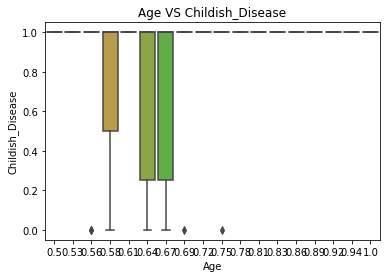

In [26]:
bx=sns.boxplot(x='0.69',y='0',data=dataset)
bx.set(xlabel='Age',ylabel='Childish_Disease',title='Age VS Childish_Disease')


[Text(0, 0.5, 'Trauma'),
 Text(0.5, 0, 'Childish_Disease'),
 Text(0.5, 1.0, 'Childish_Disease VS Trauma')]

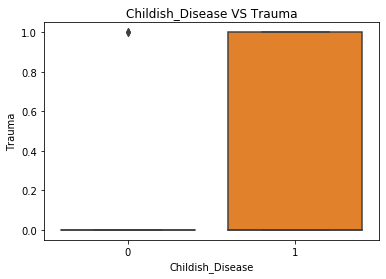

In [27]:
bx=sns.boxplot(x='0',y='1',data=dataset)
bx.set(xlabel='Childish_Disease',ylabel='Trauma',title='Childish_Disease VS Trauma')


[Text(0, 0.5, 'Surgical_Intervention'),
 Text(0.5, 0, 'Trauma'),
 Text(0.5, 1.0, 'Trauma VS Surgical_Intervention')]

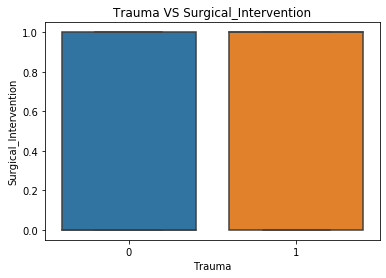

In [28]:
bx=sns.boxplot(x='1',y='1.1',data=dataset)
bx.set(xlabel='Trauma',ylabel='Surgical_Intervention',title='Trauma VS Surgical_Intervention')


[Text(0, 0.5, 'Fever'),
 Text(0.5, 0, 'Surgical_Intervention'),
 Text(0.5, 1.0, 'Surgical_Intervention VS Fever')]

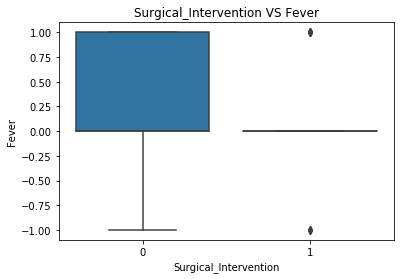

In [29]:
bx=sns.boxplot(x='1.1',y='0.1',data=dataset)
bx.set(xlabel='Surgical_Intervention',ylabel='Fever',title='Surgical_Intervention VS Fever')


[Text(0, 0.5, 'Alcoholic'),
 Text(0.5, 0, 'Fever'),
 Text(0.5, 1.0, 'Fever VS Alcoholic')]

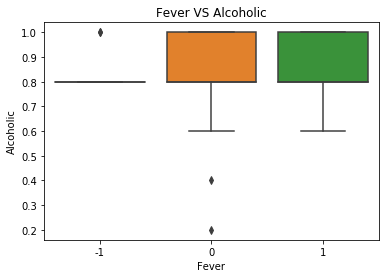

In [30]:
bx=sns.boxplot(x='0.1',y='0.8',data=dataset)
bx.set(xlabel='Fever',ylabel='Alcoholic',title='Fever VS Alcoholic')


[Text(0, 0.5, 'Smoking'),
 Text(0.5, 0, 'Alcoholic'),
 Text(0.5, 1.0, 'Alcoholic VS Smoking')]

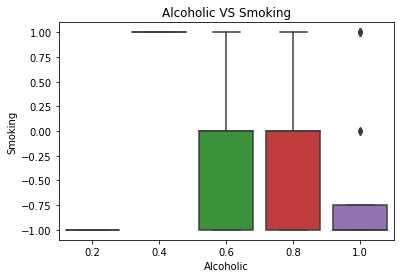

In [31]:
bx=sns.boxplot(x='0.8',y='0.2',data=dataset)
bx.set(xlabel='Alcoholic',ylabel='Smoking',title='Alcoholic VS Smoking')


[Text(0, 0.5, 'Sitting'),
 Text(0.5, 0, 'Smoking'),
 Text(0.5, 1.0, 'Smoking VS Sitting')]

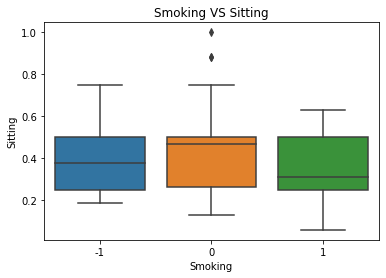

In [32]:
bx=sns.boxplot(x='0.2',y='0.88',data=dataset)
bx.set(xlabel='Smoking',ylabel='Sitting',title='Smoking VS Sitting')


[Text(0, 0.5, 'Output'),
 Text(0.5, 0, 'Sitting'),
 Text(0.5, 1.0, 'Sitting VS Output')]

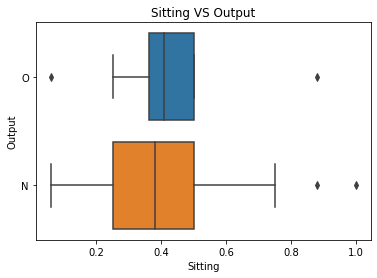

In [33]:
bx=sns.boxplot(x='0.88',y='N',data=dataset)
bx.set(xlabel='Sitting',ylabel='Output',title='Sitting VS Output')


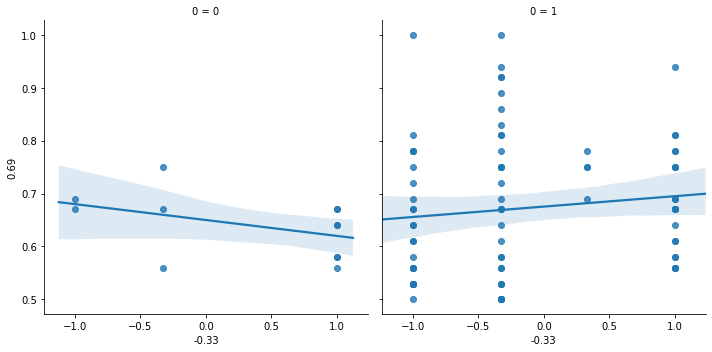

In [34]:
sns.lmplot(x="-0.33",y="0.69",data=dataset,col="0")


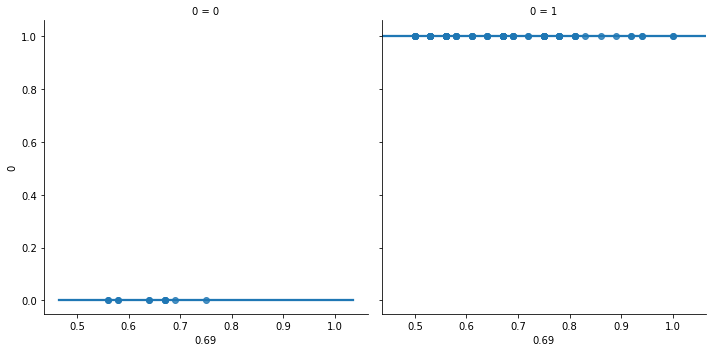

In [35]:
sns.lmplot(x="0.69",y="0",data=dataset,col="0")


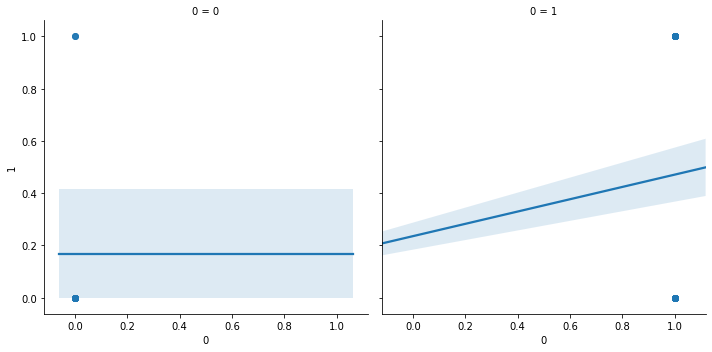

In [36]:
sns.lmplot(x="0",y="1",data=dataset,col="0")


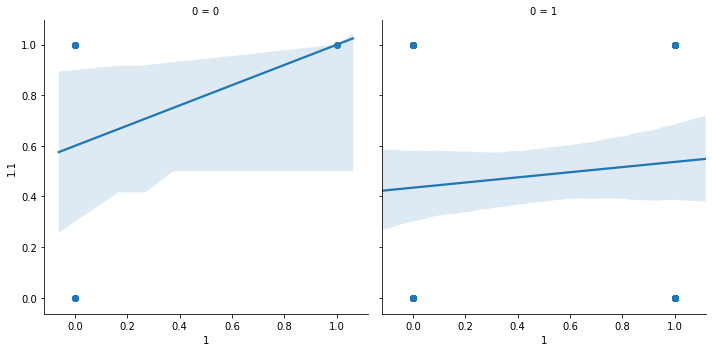

In [37]:
sns.lmplot(x="1",y="1.1",data=dataset,col="0")


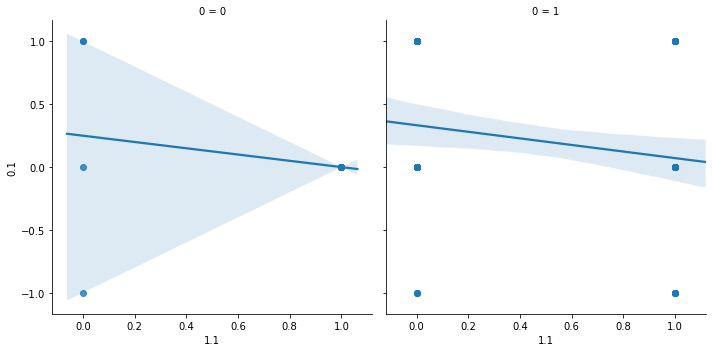

In [38]:
sns.lmplot(x="1.1",y="0.1",data=dataset,col="0")


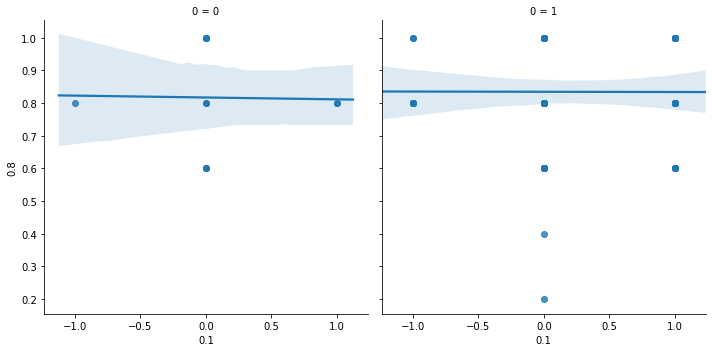

In [39]:
sns.lmplot(x="0.1",y="0.8",data=dataset,col="0")


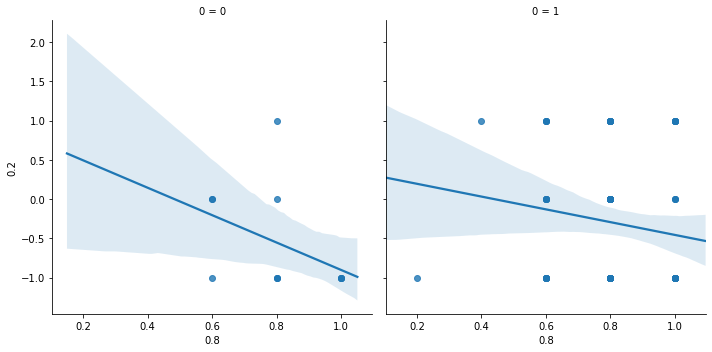

In [40]:
sns.lmplot(x="0.8",y="0.2",data=dataset,col="0")


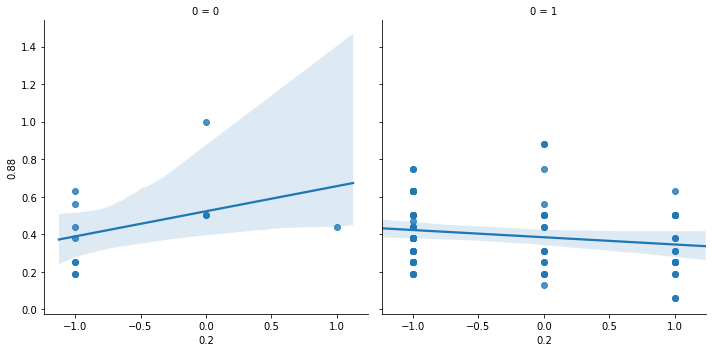

In [41]:
sns.lmplot(x="0.2",y="0.88",data=dataset,col="0")


In [63]:
def d_tree():
    x=dataset.iloc[:90,0:7]
    y=dataset.iloc[:90,7:8]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
    classifier = DecisionTreeClassifier(criterion="entropy", splitter="random", max_depth=4)
    z=classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy=metrics.accuracy_score(y_test,y_pred)*100
    print("Accuracy:",accuracy,"%")
    print(confusion_matrix(y_test, y_pred))
    plt.plot(y_test, y_pred)
    plt.show()
    

Accuracy: 56.52173913043478 %
[[9 1 0]
 [2 4 0]
 [7 0 0]]


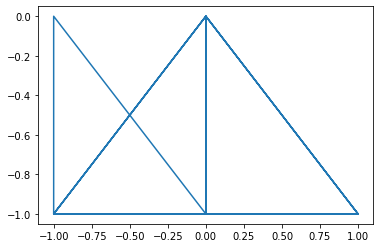

In [64]:
d_tree()


In [46]:
def linear_reg():
    x=dataset.iloc[:90,0:4]
    y=dataset.iloc[:90,5:9]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
    slr=LinearRegression()
    slr.fit(x_train,y_train)
    y_predict=slr.predict(x_test)
    #accuracy=metrics.accuracy_score(y_test,y_predict)*100
    #print("Accuracy:",accuracy,"%")
    plt.scatter(x_train,y_train,color='black')
    plt.plot(x_train,slr.predict(x_train))
    plt.show()
    

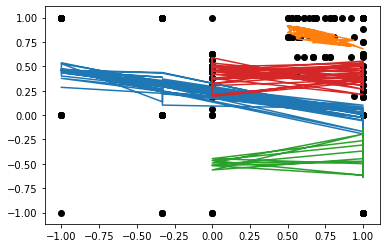

In [47]:
linear_reg()


In [48]:
dataset['rate_code']=(dataset['N']=='N').astype(npy.float32)


In [49]:
def plot():
    sns.lmplot(x="0.8",y="0.2",col="rating",data=dataset)
    

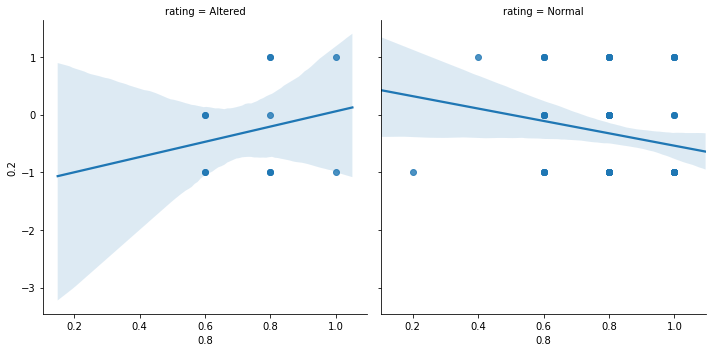

In [50]:
plot()
